In [100]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [101]:
amz = pd.read_csv('amazon_prime_titles.csv')
amz.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [102]:
amz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


## Director

In [103]:
# How should missing or empty values in columns like 'director', 'cast', 'country', and 'rating'
#  be handled to ensure they do not skew category-based aggregations or comparisons?
amz['director'].isnull().sum()

np.int64(2083)

In [104]:
amz[amz['cast'].isnull()].index

Index([  20,   25,   33,   34,   70,   72,   74,   76,   77,   78,
       ...
       9559, 9564, 9586, 9612, 9622, 9636, 9637, 9645, 9647, 9658],
      dtype='int64', length=1233)

In [105]:
amz.iloc[33]


show_id                                                       s34
type                                                        Movie
title                             Young Love (at the Sun Factory)
director                                                      NaN
cast                                                          NaN
country                                                       NaN
date_added                                                    NaN
release_year                                                 2007
rating                                                         NR
duration                                                   36 min
listed_in                               Music Videos and Concerts
description     Young Love celebrates the release of "Too Youn...
Name: 33, dtype: object

In [106]:
amz[amz['director'].isnull()].index

Index([  17,   18,   20,   21,   23,   26,   27,   28,   29,   30,
       ...
       9637, 9642, 9645, 9647, 9651, 9655, 9658, 9661, 9664, 9666],
      dtype='int64', length=2083)

In [107]:
amz['country'].nunique()

86

### CAST


In [108]:
missing_rows = amz[amz['cast'].isnull()]
print(missing_rows.head())


   show_id     type                             title            director  \
20     s21  TV Show                        Zoboomafoo                 NaN   
25     s26    Movie            Zambezi: Force of Life  Dr. Rudolf Lammers   
33     s34    Movie   Young Love (at the Sun Factory)                 NaN   
34     s35    Movie   Young Love (at Bowery Ballroom)                 NaN   
70     s71    Movie  World Inferno Friendship Society        Baeble Music   

   cast country date_added  release_year rating  duration  \
20  NaN     NaN        NaN          2001   TV-Y  1 Season   
25  NaN     NaN        NaN          2005    ALL    50 min   
33  NaN     NaN        NaN          2007     NR    36 min   
34  NaN     NaN        NaN          2007     NR    37 min   
70  NaN     NaN        NaN          2007     NR    40 min   

                    listed_in  \
20                       Kids   
25                Documentary   
33  Music Videos and Concerts   
34  Music Videos and Concerts   
70  M

### Date Added


In [109]:
amz['date_added']

0       March 30, 2021
1       March 30, 2021
2       March 30, 2021
3       March 30, 2021
4       March 30, 2021
             ...      
9663               NaN
9664               NaN
9665               NaN
9666               NaN
9667               NaN
Name: date_added, Length: 9668, dtype: object

In [110]:
amz['date_added'].dtype


dtype('O')

In [111]:
## date_added convert to datetime
amz['date_added'] = pd.to_datetime(amz['date_added'], errors = 'coerce')
amz['date_added'].dtype


dtype('<M8[ns]')

In [112]:
amz['date_added'].isnull().sum()

np.int64(9513)

In [113]:
## impute missing values using 'Unknown'
amz.fillna({'director': 'Unknown', 'cast':'Unknown'}, inplace=True)

In [114]:
## Drop 'Country' and 'date_added' columns
amz.drop(columns = ['country', 'date_added'], inplace=True)

## Rating

In [115]:
amz['rating'].value_counts()

rating
13+         2117
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
UNRATED       33
NC-17          3
AGES_18_       3
NOT_RATE       3
AGES_16_       2
16             1
ALL_AGES       1
Name: count, dtype: int64

In [116]:
rating_map = {'AGES_16': "16+",
              "16":"16+",
              "AGES_16_":"16+",
              'AGES_18_':"18+",
              "ALL_AGES":"ALL",
              "NOT_RATE":"NR",
              "UNRATED":"NR",
              "NC-17":"17+",
              "TV-NR":"NR"
}

amz['rating'] = amz['rating'].replace(rating_map)

In [117]:
amz['rating'].unique()

array([nan, '13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+',
       'TV-PG', '7+', 'TV-14', 'TV-G', 'PG-13', 'TV-MA', 'G', 'PG', '17+'],
      dtype=object)

In [118]:
amz['rating'].fillna('NR', inplace=True)

/var/folders/g2/z2xpfp7x5hvgkf6rx1kgrx4w0000gn/T/ipykernel_72793/3575080950.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amz['rating'].fillna('NR', inplace=True)


In [119]:
# Calculate missing values count and percentage for each column
missing_percent = (amz.isnull().sum() / len(amz)) * 100
print(missing_percent)


show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64


In [120]:
amz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      9668 non-null   object
 4   cast          9668 non-null   object
 5   release_year  9668 non-null   int64 
 6   rating        9668 non-null   object
 7   duration      9668 non-null   object
 8   listed_in     9668 non-null   object
 9   description   9668 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.4+ KB


### Analysis

In [121]:
amz

,show_id,type,title,director,cast,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014,NR,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017,NR,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014,NR,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989,NR,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,Unknown,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,Unknown,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [122]:
amz['type'].value_counts()

type
Movie      7814
TV Show    1854
Name: count, dtype: int64

In [123]:
amz['listed_in']

0                 Comedy, Drama
1          Drama, International
2       Action, Drama, Suspense
3                   Documentary
4                Drama, Fantasy
                 ...           
9663                     Comedy
9664                   TV Shows
9665                     Action
9666              Drama, Sports
9667    Action, Drama, Suspense
Name: listed_in, Length: 9668, dtype: object

In [124]:
# 1️⃣ Clean whitespace and lowercase
amz['listed_in'] = amz['listed_in'].str.strip().str.lower()

In [125]:
amz['listed_in']

0                 comedy, drama
1          drama, international
2       action, drama, suspense
3                   documentary
4                drama, fantasy
                 ...           
9663                     comedy
9664                   tv shows
9665                     action
9666              drama, sports
9667    action, drama, suspense
Name: listed_in, Length: 9668, dtype: object

In [126]:
# Split into multiple genres (creates a list in each row)
amz['listed_in_split'] = amz['listed_in'].str.split(', ')

In [127]:
amz

,show_id,type,title,director,cast,release_year,rating,duration,listed_in,description,listed_in_split
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014,NR,113 min,"comedy, drama",A small fishing village must procure a local d...,"[comedy, drama]"
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110 min,"drama, international",A Metro Family decides to fight a Cyber Crimin...,"[drama, international]"
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017,NR,74 min,"action, drama, suspense",After a man discovers his wife is cheating on ...,"[action, drama, suspense]"
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014,NR,69 min,documentary,"Pink breaks the mold once again, bringing her ...",[documentary]
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989,NR,45 min,"drama, fantasy",Teenage Matt Banting wants to work with a famo...,"[drama, fantasy]"
...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",1940,7+,60 min,comedy,New York City street principles get an East Si...,[comedy]
9664,s9665,TV Show,Planet Patrol,Unknown,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",2018,13+,4 Seasons,tv shows,"This is Earth, 2100AD - and these are the adve...",[tv shows]
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",2008,R,90 min,action,"In war-torn Eastern Europe, a world-weary grou...",[action]
9666,s9667,TV Show,Maradona: Blessed Dream,Unknown,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",2021,TV-MA,1 Season,"drama, sports","The series tells the story of Diego Maradona, ...","[drama, sports]"


In [128]:
# 3️⃣ Explode to count frequency of each genre
genre_counts = amz['listed_in_split'].explode().value_counts()

print(genre_counts.head(10))  # Top 10 most common genres


listed_in_split
drama               3687
comedy              2099
action              1657
suspense            1501
kids                1085
documentary          993
special interest     980
horror               875
romance              674
animation            547
Name: count, dtype: int64


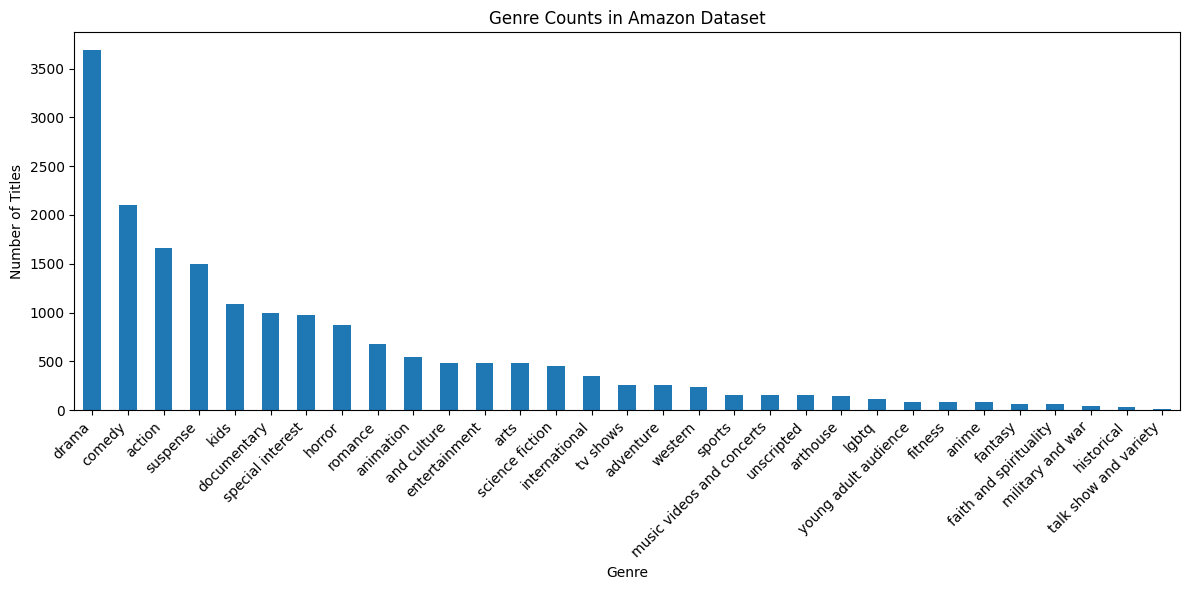

In [129]:
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title("Genre Counts in Amazon Dataset")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [130]:
amz['duration']

0         113 min
1         110 min
2          74 min
3          69 min
4          45 min
          ...    
9663       60 min
9664    4 Seasons
9665       90 min
9666     1 Season
9667      103 min
Name: duration, Length: 9668, dtype: object

In [131]:
amz['duration'].value_counts()

duration
1 Season      1342
2 Seasons      229
90 min         223
91 min         220
92 min         203
              ... 
21 Seasons       1
485 min          1
550 min          1
181 min          1
191 min          1
Name: count, Length: 219, dtype: int64

In [132]:
amz['duration_num'] = amz['duration'].str.extract(r'(\d+)').astype(float)
# str.extract(r'(\d+)') uses a regular expression to pull out only the numeric part of the string
#astype(float) ensures the numbers are stored as numeric values, so we can do calculations.

In [133]:
amz['duration_num']

0       113.0
1       110.0
2        74.0
3        69.0
4        45.0
        ...  
9663     60.0
9664      4.0
9665     90.0
9666      1.0
9667    103.0
Name: duration_num, Length: 9668, dtype: float64

In [134]:
amz['duration_unit'] = amz['duration'].str.extract(r'([A-Za-z])').iloc[:, 0].str.lower()
amz['duration_unit'].unique()

array(['m', 's'], dtype=object)

In [145]:
# Map 'm' → 'minutes' and 's' → 'seasons'
amz['duration_unit'] = amz['duration_unit'].replace({'m': 'minutes', 's': 'seasons'})


In [ ]:
# Convert 'minutes' to hours for better interpretability
average_minutes_per_season = 450   # Assuming an average of 450 minutes per season

In [136]:
# How can the 'duration' column be cleaned to separate numerical values from units (e.g., "113 min" or "1 Season"), and 
# should TV shows and movies be processed differently for uniformity?

In [139]:
# What methods can be used to detect and remove duplicate entries based on 'title' and 'release_year', 
# considering potential variations in formatting or partial matches?

In [140]:
# How should the 'cast' column be preprocessed to handle multiple actors (e.g., splitting comma-separated names) 
# for actor-based frequency or network analysis?

In [141]:
# What techniques are appropriate for validating and cleaning the 'release_year' 
# column to ensure all values are valid integers within a reasonable historical range?

In [142]:
# How can the 'description' column be preprocessed for text analysis, such as removing special characters, 
# handling truncation indicators (e.g., "..."), or tokenizing for keyword extraction?

In [143]:
# What preprocessing steps are needed to handle quoted strings in columns like 'title' or 'description' that may contain commas, to prevent parsing errors in CSV reading?


In [144]:
#What is the distribution of content types (Movie vs. TV Show) across different countries, 
# and how does this vary by release year?
